<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_6/Reg__vs__KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo Reg. Lineal vs KNN**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 3 de febrero de 2022 
*   Fechad de actualización: 4 de febrero de 2022
*   Descripción: Se genera un modelo vecinos cercacnos o mejor conocido como KNN 

In [33]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos 
from sklearn.preprocessing import StandardScaler #Herramienta para la estandarizaci[on de datos
from sklearn.neighbors import KNeighborsClassifier #herramienta que permite crear modelos KNN de clasificacion
from sklearn.neighbors import KNeighborsRegressor #herramienta que permite crear modelos KNN de regresion
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
abulon =  '/content/drive/MyDrive/Coding_Dojo/Semana 5/Data/abalone (1).data' #Nombro a la base
abulon_df= pd.read_csv(abulon, header = None) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
#ademas uso el argumento header para queno tome la primera fila como nombres de columna 
abulon_df.head() #Observo que los datos hayan sido leidos de forma correcta

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [36]:
abulon_df.rename(columns = {0:'sex', 1:'Length', 2:'Diameter', 3:'Height'	, 4:'Whole weight', 5:'Shucked weight', 6:'Viscera weight', 
                    7:'Shell weight', 8:'Rings'	}, inplace = True)
#renombro las columnas de mi base 
abulon_df.head()

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
abulon_df.columns= abulon_df.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [38]:
abulon_df.columns = abulon_df.columns.str.replace(' ', '_') #en esta linea realizo el cambio de los espacios del nombre de las columnas por 
#el '_' 

In [39]:
abulon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


###### no exsiten datos perdido por lo cual no se realiza mas pasos de preparacion de data 

### Ordenamiento de datos 

In [40]:
X = abulon_df.loc[:, ['diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight']]
X.shape

(4177, 6)

In [41]:
y = abulon_df.loc[:,'rings']
y.shape

(4177,)

### Modelo de regresion

In [42]:
abulon_corr= round(abulon_df.corr(),2) #el comando .corr de la libreria de regresion no permite observar la no multicolinealidad, para evitar que un dato este abserviendo la 
#informacion de los otros datos
abulon_corr

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole_weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shucked_weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera_weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell_weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


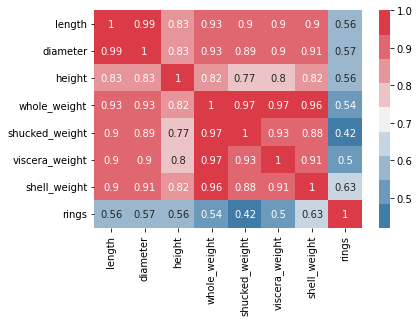

In [43]:
sns.heatmap(abulon_corr, cmap = sns.diverging_palette(240, 10, n=9), annot= True) # el comando cmap= me permite definir el color de la paleta la cual es sns.diverging_palette 
#esta me permite tener los colores rojo para los valores mas alto apartir de la media ya zules para aquelloos que se alejan de la misma 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce283dc50>,
      dtype=object)

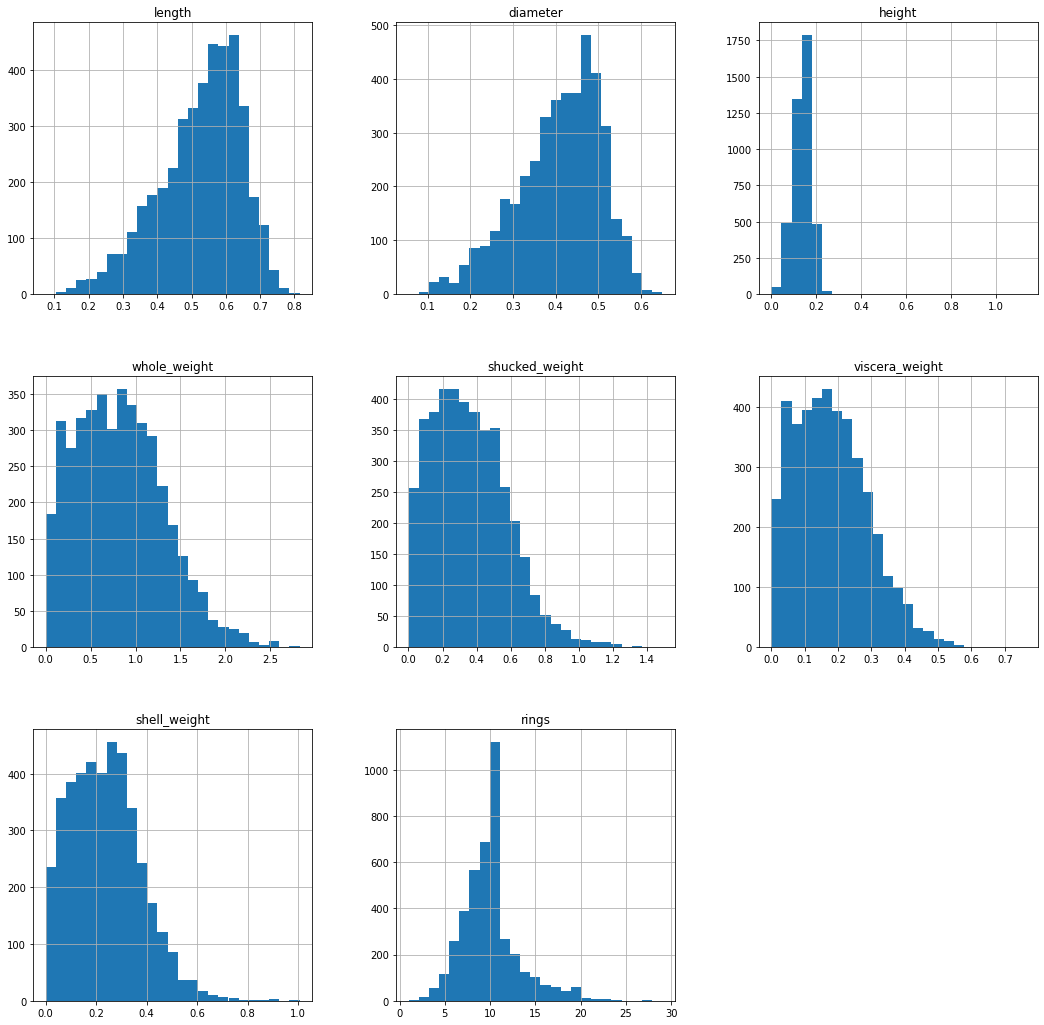

In [44]:
abulon_df.loc[:,:].hist(bins=25, figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 ) # en este codigo primero defino todos los valores que deseo visualizar
# en este caso estoy pidiendo todas las columnas y filas ademas el bind que le pido que sean 25 secuencias para fines vizuales y el ta;o de las etiquetas en loes ejes
# ademas del xrot que me permite definir el angulo de las etiquetas en los ejes en este caso al no ser demasiado largas escojo una rotacion de 0 grados 

In [45]:
lreg = LinearRegression(fit_intercept=True)
lreg

LinearRegression()

In [46]:
lreg.fit(X,y)

LinearRegression()

In [47]:
lreg.predict(X[0:10])

array([ 8.75655143,  7.2306154 , 10.84223251,  9.22512431,  6.96962832,
        8.16407153, 13.31918555, 11.21550642,  9.30381506, 12.94158134])

In [48]:
r_2 = round(lreg.score(X,y),2)
print( 'El valor r cuadrdrado es de:', r_2)

El valor r cuadrdrado es de: 0.53


### Modelo KNN



In [49]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [50]:
knn = KNeighborsRegressor(n_neighbors=3)

In [51]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [52]:
knn.predict(X)

array([10.        ,  6.33333333,  9.33333333, ..., 10.66666667,
       10.        , 11.33333333])

In [53]:
score = knn.score(X, y)

In [54]:
print( 'El valor r cuadrdrado es de:', score)

El valor r cuadrdrado es de: 0.7256841916669572


### Estadarizacion de los datos y conjustos de prueba y test 

In [55]:
scaler = StandardScaler() #creuna variable que permita standarizar los datos 
scaler.fit(X) #calcula el promedio de la desviacion estandar de uno  de los conjuntos creados 
X = scaler.transform(X) #utlizamos el escaaldo para estandarizar los datos de los conjuntos 


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

### Modelo de regresion con validacion

In [61]:
lreg.fit(X_test,y_test)

LinearRegression()

In [62]:
lreg.predict(X_test[0:10])

array([10.23002602, 10.82335251, 11.27503076, 11.25922617, 10.24647957,
        8.89252172,  8.75369304, 13.96252191, 10.79317963,  8.24013633])

In [63]:
lreg.score(X_test, y_test)

0.510922911880205

### Modelo de regresion KNN con validacion 

In [59]:
prediction=knn.predict(X_test)
prediction

array([10.66666667, 11.66666667, 11.33333333, ...,  8.        ,
        8.33333333, 14.33333333])

In [60]:
score = np.around(knn.score(X_test, y_test),2)
score

0.73



1.   ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?

*   El modelo KNN presenta un jeor ajuste teniendo un score de 73%


2.   ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?

*    Mantiene un mejor ajuste el modelo KNN

3.   ¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?

* Si debido a que los argumentos que pueden ser parte del modelo KNN son mayores aunque esto puede ser una ventaja al momento de ajustar el modelo  

4.  ¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?

* Si de hecho se podria realizar un cuadro con los scores de cada modelo para mostrar el ajuste y explicar los beneficios en eficiencia al momento de escribir el modelo

5.  ¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?

* Si para mejorar el ajuste modelo se pueden realizar una validacion cruzada para ver cuales son los parametrso que ajustan mejor al modelo.

